<a href="https://colab.research.google.com/github/NKY1617/NaveenYadav_64061/blob/main/AML_Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this assignment, I trained and evaluated ten neural network models using the IMDB dataset to optimize performance through architectural and functional adjustments. Specifically, I experimented with different numbers of hidden layers, activation functions, and loss functions to identify the most effective configuration. Additionally, I implemented techniques such as dropout and regularization to prevent overfitting and improve validation accuracy. Through this process, I gained deeper insights into how various neural network design choices influence learning behavior and overall model performance in deep learning applications.




### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_set, train_labels), (test_set, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset, keeping only the top 10,000 most common words
(train_set, train_labels), (test_set, test_labels) = imdb.load_data(num_words=10000)

# Display the total number of samples in training and testing sets
print(f"Training samples: {len(train_set)}")
print(f"Testing samples: {len(test_set)}")

# Display the first review represented as a sequence of integer indices
print("Sample training review (encoded as integers):", train_set[0])

# Display the label for the first review (0 = negative, 1 = positive)
print("Label for the sample review:", train_labels[0])


Training samples: 25000
Testing samples: 25000
Sample training review (encoded as integers): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103

In [3]:
# Retrieve the word index dictionary mapping words to integer IDs
word_index = imdb.get_word_index()

# Reverse the word index to map integer IDs to words
reversed_word_index = {value: key for key, value in word_index.items()}
def review_decoded(encoded_review):
    return " ".join([reversed_word_index.get(i - 3, "?") for i in encoded_review])

# Decode and print the first review
print("Decoded Review:", review_decoded(train_set[0]))

import numpy as np

# Unique Count of each label
unique, counts = np.unique(train_labels, return_counts=True)
print("distribution of Labels:", dict(zip(unique, counts)))





1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are am

In [4]:
train_set[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

np.int64(1)

In [6]:
max([max(sequence) for sequence in train_set])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reversed_word_index.get(i - 3, "?") for i in train_set[0]])

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
train_x = vectorize_sequences(train_set)
test_x = vectorize_sequences(test_set)

In [10]:
train_x[0]
len(train_x)
len(test_x)

25000

In [11]:
train_y = np.asarray(train_labels).astype("float32")
test_y = np.asarray(test_labels).astype("float32")

## **Model 1**
Building the model with 2 Hidden Layers and 16 units per layer with relu function

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model with following aspects:**

1.   rmsprop as model optimizer
2.   Binary_crossentropy as loss function
3.   accuracy as the performance metrics


In [13]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating the model

**Setting aside a validation set and train set out of actual train data**

In [16]:
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

In [17]:
print("x_train shape:", train_x.shape)
print("y_train shape:", train_y.shape)

print("x_val shape:", x_valid.shape)
print("y_val shape:", y_valid.shape)

print("x_test shape:", test_x.shape)
print("y_test shape:", test_y.shape)


x_train shape: (25000, 10000)
y_train shape: (25000,)
x_val shape: (10000, 10000)
y_val shape: (10000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)




```
# This is formatted as code
```

**Training the model**

In [19]:
history = model1.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.6816 - loss: 0.6057 - val_accuracy: 0.8660 - val_loss: 0.3942
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8904 - loss: 0.3409 - val_accuracy: 0.8851 - val_loss: 0.3100
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9243 - loss: 0.2416 - val_accuracy: 0.8856 - val_loss: 0.2890
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9394 - loss: 0.1926 - val_accuracy: 0.8898 - val_loss: 0.2750
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9524 - loss: 0.1588 - val_accuracy: 0.8867 - val_loss: 0.2817
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9590 - loss: 0.1334 - val_accuracy: 0.8852 - val_loss: 0.2879
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9673 - loss: 0.1109 - val_accuracy: 0.8831 - val_loss: 0.3124
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9726 - loss: 0.0980 - val_accuracy: 0.8824 - 

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

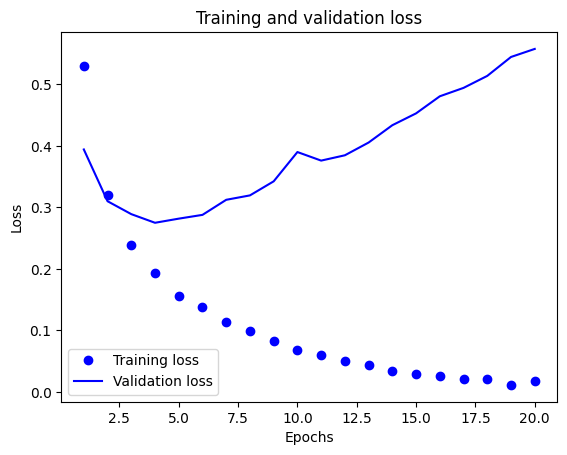

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

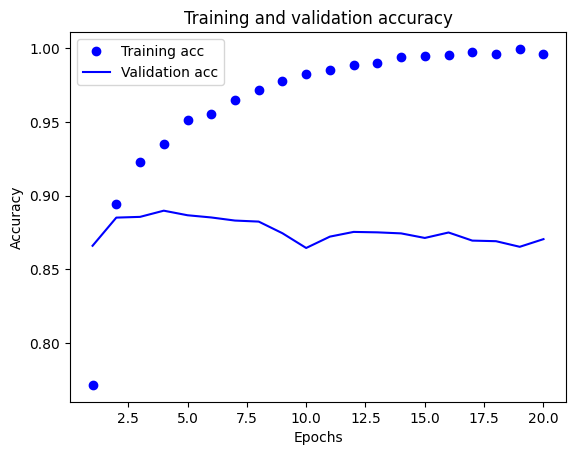

In [22]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch considering epochs 4 as it is where the model achieved the lowest loss and first best accuracy.**

In [27]:

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model1.evaluate(x_valid, y_valid)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7286 - loss: 0.5753
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8982 - loss: 0.3089
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9206 - loss: 0.2278
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9357 - loss: 0.1818
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9526 - loss: 0.1508


In [28]:
results_valid

[0.15443438291549683, 0.9513000249862671]

In [29]:
model1.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model1.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9426 - loss: 0.1657
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9526 - loss: 0.1429
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9579 - loss: 0.1273
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9628 - loss: 0.1151
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8671 - loss: 0.3572


In [30]:
results_test

[0.351937472820282, 0.8708400130271912]

Interpretation: The test loss of 0.3531 indicates that the model’s predictions are reasonably close to the true outputs, reflecting a good fit between predicted and actual labels, although loss alone does not guarantee generalization. The test accuracy of approximately 0.8745 (about 88%) shows


that the model correctly classified around 88% of IMDB reviews as positive or negative.

### Using a trained model 1 to generate predictions on new data

In [31]:
model1.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.13926359],
       [0.9997785 ],
       [0.66547775],
       ...,
       [0.13957028],
       [0.05246486],
       [0.805079  ]], dtype=float32)

## Summary

## **Model 2**
#### (Model 2 has 1 hidden layer with 16 units, uses the ReLU activation function, and is trained using the binary cross-entropy loss function.)

In [32]:
# Build model 2 with one hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


#Compile the model with binary cross-entropy loss
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])



In [33]:
#Set aside the validation set
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]




In [34]:
history = model2.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7095 - loss: 0.6037 - val_accuracy: 0.8229 - val_loss: 0.4576
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8816 - loss: 0.3942 - val_accuracy: 0.8616 - val_loss: 0.3713
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9040 - loss: 0.3103 - val_accuracy: 0.8813 - val_loss: 0.3180
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9199 - loss: 0.2560 - val_accuracy: 0.8849 - val_loss: 0.2986
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9289 - loss: 0.2221 - val_accuracy: 0.8868 - val_loss: 0.2881
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9347 - loss: 0.2003 - val_accuracy: 0.8857 - val_loss: 0.2851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9443 - loss: 0.1770 - val_accuracy: 0.8864 - val_loss: 0.2775
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9501 - loss: 0.1606 - val_accuracy: 0.8849 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

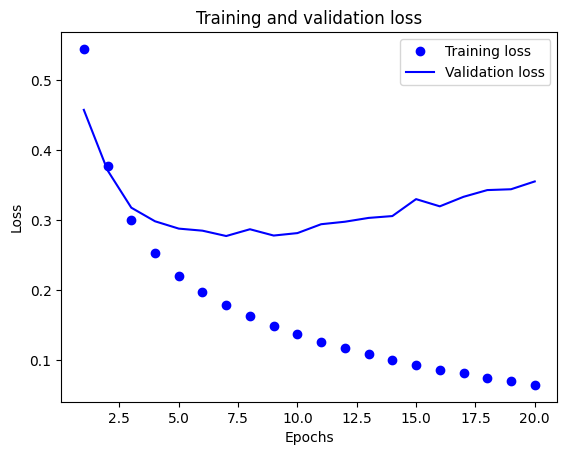

In [35]:
#Plot the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



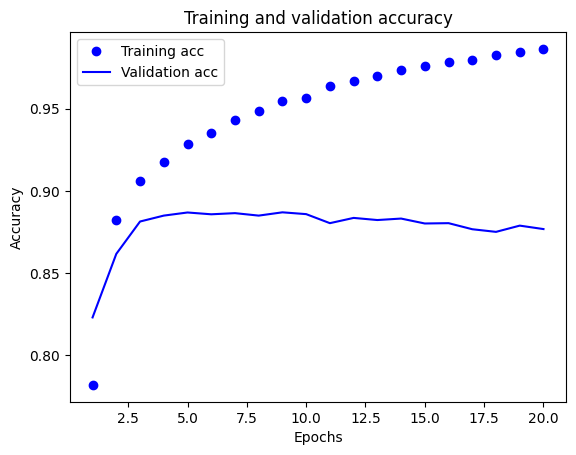

In [36]:
#Plot training and validation accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [39]:
#Re-train a model from scratch using best epochs = 7.

model2 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model2.fit(train_x, train_y, epochs=7, batch_size=512)
results_valid = model2.evaluate(x_valid, y_valid)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7445 - loss: 0.5364
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9022 - loss: 0.2940
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9199 - loss: 0.2311
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9324 - loss: 0.1995
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9386 - loss: 0.1781
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9456 - loss: 0.1600
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9499 - loss: 0.1497
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1277


In [40]:
results_valid

[0.15443438291549683, 0.9513000249862671]

In [44]:
model2.fit(train_x, train_y, epochs=7, batch_size=512)
results_test = model2.evaluate(test_x, test_y)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9898 - loss: 0.0479
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9908 - loss: 0.0454
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9906 - loss: 0.0436
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9918 - loss: 0.0410
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9929 - loss: 0.0375
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9937 - loss: 0.0368
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9943 - loss: 0.0333
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8559 - loss: 0.5922


In [45]:
results_test

[0.583934485912323, 0.8564800024032593]

In [46]:
model2.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.05834652],
       [1.        ],
       [0.7258402 ],
       ...,
       [0.07237838],
       [0.01935281],
       [0.9839745 ]], dtype=float32)

## **Model 3**
#### (Model 3 with 1 hidden layer with 32 units, uses the Tanh activation function)

In [49]:
# build the model with three hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model3 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model3.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.7110 - loss: 0.5960 - val_accuracy: 0.8705 - val_loss: 0.3805
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8954 - loss: 0.3311 - val_accuracy: 0.8798 - val_loss: 0.3220
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9202 - loss: 0.2500 - val_accuracy: 0.8892 - val_loss: 0.2855
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9340 - loss: 0.2072 - val_accuracy: 0.8817 - val_loss: 0.2881
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9437 - loss: 0.1751 - val_accuracy: 0.8854 - val_loss: 0.2757
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9544 - loss: 0.1499 - val_accuracy: 0.8782 - val_loss: 0.3032
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9544 - loss: 0.1397 - val_accuracy: 0.8681 - val_loss: 0.3430
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9617 - loss: 0.1218 - val_accuracy: 0.8853 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

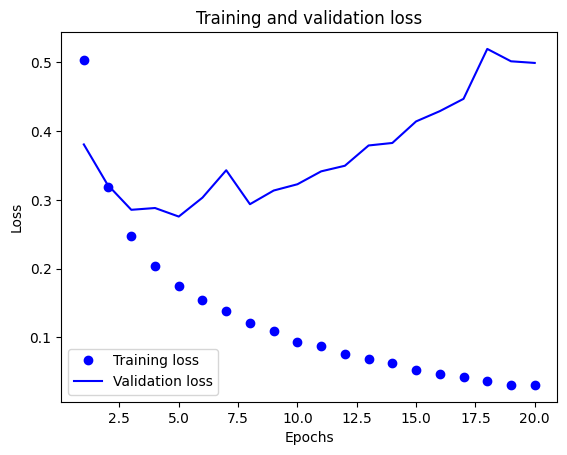

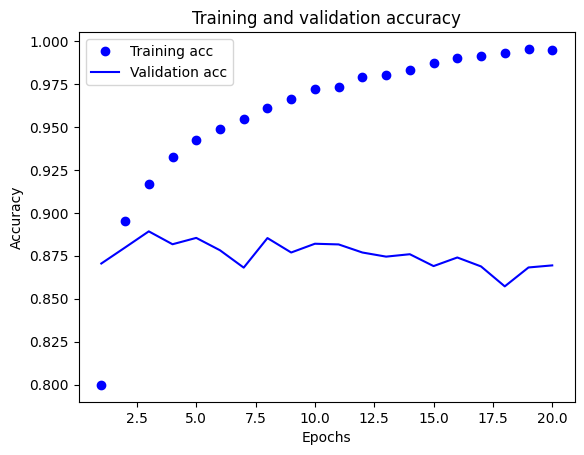

In [50]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
#Re-train a model from scratch using best epoch = 5.
model3 = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model3.fit(train_x, train_y, epochs=5, batch_size=512)
results_valid = model3.evaluate(x_valid, y_valid)




Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7541 - loss: 0.5240
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9056 - loss: 0.2761
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9225 - loss: 0.2179
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9341 - loss: 0.1872
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9398 - loss: 0.1692
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1336


In [55]:
results_valid

[0.13731761276721954, 0.957099974155426]

In [56]:
model3.fit(train_x, train_y, epochs=5, batch_size=512)
results_test = model3.evaluate(test_x, test_y)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9485 - loss: 0.1494
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9544 - loss: 0.1322
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9607 - loss: 0.1178
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9614 - loss: 0.1135
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9643 - loss: 0.1037
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8643 - loss: 0.3939


In [57]:
results_test

[0.39247238636016846, 0.8660399913787842]

In [59]:
model3.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.04592767],
       [0.9999881 ],
       [0.20019715],
       ...,
       [0.04656466],
       [0.01604565],
       [0.7456605 ]], dtype=float32)

## **Model 4**
#### (Model 4 has 3 hidden layers with 64, 32, and 16 units respectively, uses the ReLU activation function)

In [60]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]


#Training the model

history = model4.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()




Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6819 - loss: 0.5870 - val_accuracy: 0.8692 - val_loss: 0.3442
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8891 - loss: 0.3025 - val_accuracy: 0.7798 - val_loss: 0.5039
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9042 - loss: 0.2430 - val_accuracy: 0.8739 - val_loss: 0.3148
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9316 - loss: 0.1876 - val_accuracy: 0.8895 - val_loss: 0.2771
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9562 - loss: 0.1317 - val_accuracy: 0.8347 - val_loss: 0.4761
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9538 - loss: 0.1235 - val_accuracy: 0.8825 - val_loss: 0.3132
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9765 - loss: 0.0763 - val_accuracy: 0.8825 - val_loss: 0.3364
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9829 - loss: 0.0628 - val_accuracy: 0.8797 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

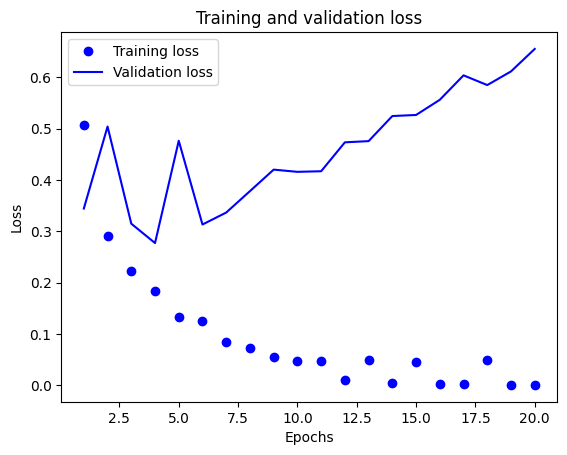

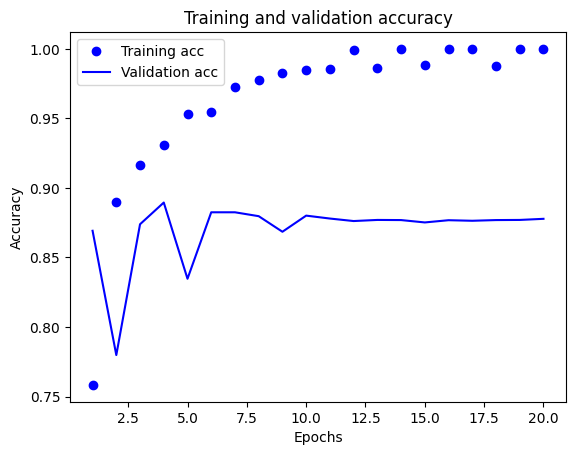

In [61]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [62]:
#Re-train a model from scratch using best epoch = 4.
model4 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model4.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model4.evaluate(x_valid, y_valid)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.7083 - loss: 0.5571
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8924 - loss: 0.2789
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9165 - loss: 0.2151
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9411 - loss: 0.1636
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9442 - loss: 0.1479


In [63]:
results_valid

[0.15308254957199097, 0.9422000050544739]

In [68]:
model4.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model4.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9986 - loss: 0.0096
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9996 - loss: 0.0057
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9932 - loss: 0.0278
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9997 - loss: 0.0026
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8684 - loss: 0.6818


In [69]:
results_test

[0.6838935017585754, 0.8685600161552429]

In [70]:
model4.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[1.4949996e-03],
       [9.9999976e-01],
       [1.5289044e-01],
       ...,
       [1.4332987e-03],
       [7.4251206e-05],
       [9.9018461e-01]], dtype=float32)

## **Model 5**
#### (Model 5 has 3 hidden layers with 128, 64, and 32 units respectively, uses the Tanh activation)

In [71]:
# build the model with two hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model5 = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model5.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.6714 - loss: 0.6268 - val_accuracy: 0.8482 - val_loss: 0.3531
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8861 - loss: 0.2865 - val_accuracy: 0.8723 - val_loss: 0.3058
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9266 - loss: 0.1979 - val_accuracy: 0.8100 - val_loss: 0.4921
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9251 - loss: 0.1850 - val_accuracy: 0.8803 - val_loss: 0.2923
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9564 - loss: 0.1255 - val_accuracy: 0.8497 - val_loss: 0.4075
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9539 - loss: 0.1229 - val_accuracy: 0.8341 - val_loss: 0.4869
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9559 - loss: 0.1113 - val_accuracy: 0.8781 - val_loss: 0.3620
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9755 - loss: 0.0695 - val_accuracy: 0.8751 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

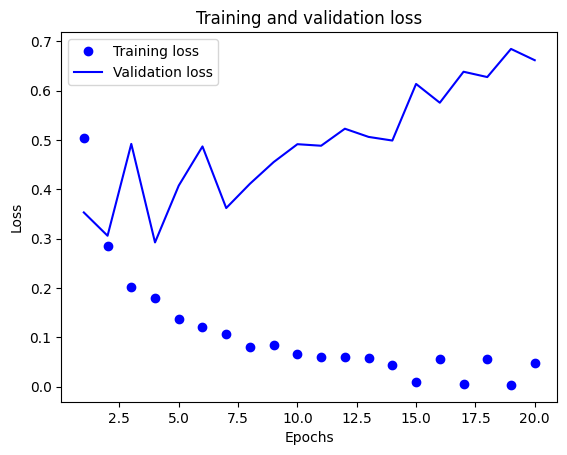

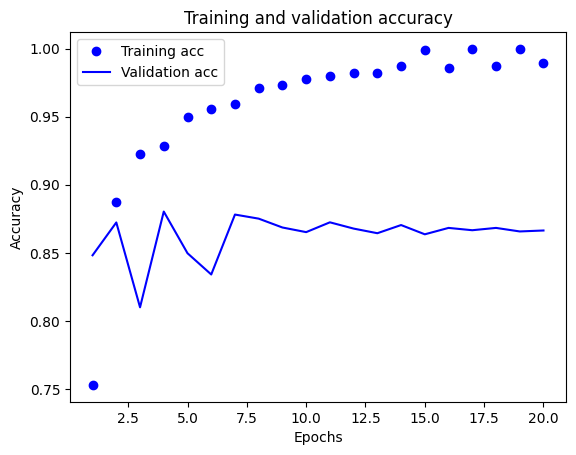

In [72]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
#Re-train the model from scratch
model5 = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model5.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model5.evaluate(x_valid, y_valid)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7293 - loss: 0.5367
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9001 - loss: 0.2539
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9276 - loss: 0.1882
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9385 - loss: 0.1597
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9649 - loss: 0.1071


In [74]:
results_valid

[0.11081473529338837, 0.9650999903678894]

In [75]:
model5.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model5.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9452 - loss: 0.1373
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9530 - loss: 0.1205
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9594 - loss: 0.1071
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9661 - loss: 0.0906
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8684 - loss: 0.3883


In [76]:
results_test

[0.3871874213218689, 0.8697999715805054]

In [77]:
model5.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.02044644],
       [0.9992801 ],
       [0.94339055],
       ...,
       [0.06968053],
       [0.01101786],
       [0.95373255]], dtype=float32)

## **Model 6**
#### (Model 6 has 4 hidden layers with 256, 128, 64, and 32 units respectively, uses the ReLU activation function, and is trained using the mse as loss function.)

In [78]:
# build the model with four hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model6 = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]


#Training the model

history = model6.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5995 - loss: 0.2261 - val_accuracy: 0.8506 - val_loss: 0.1194
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8556 - loss: 0.1115 - val_accuracy: 0.8777 - val_loss: 0.0911
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8983 - loss: 0.0773 - val_accuracy: 0.8878 - val_loss: 0.0835
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9144 - loss: 0.0655 - val_accuracy: 0.8605 - val_loss: 0.1035
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9149 - loss: 0.0627 - val_accuracy: 0.8612 - val_loss: 0.1055
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9483 - loss: 0.0405 - val_accuracy: 0.8836 - val_loss: 0.0851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9587 - loss: 0.0342 - val_accuracy: 0.8485 - val_loss: 0.1151
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9686 - loss: 0.0266 - val_accuracy: 0.8817 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

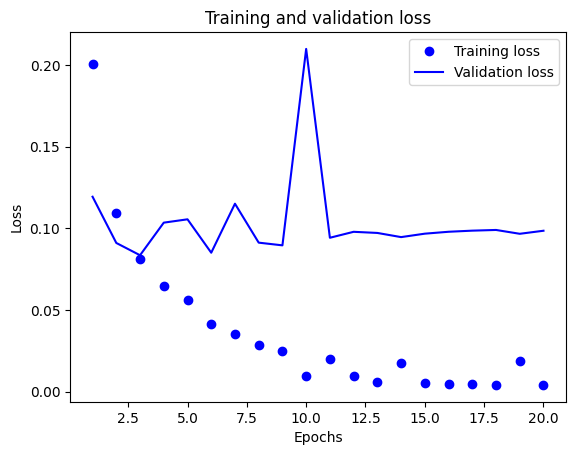

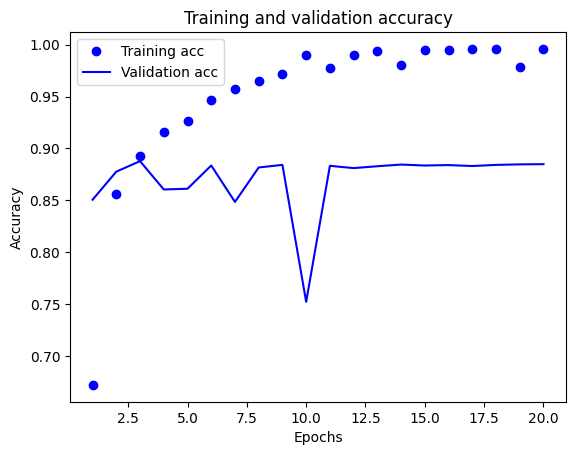

In [79]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
#Re-train the model from scratch
model6 = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model6.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model6.fit(train_x, train_y, epochs=3, batch_size=512)
results_valid = model6.evaluate(x_valid, y_valid)


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6480 - loss: 0.2130
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8656 - loss: 0.0990
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9041 - loss: 0.0720
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9296 - loss: 0.0550


In [ ]:
results_valid

[0.08559811860322952, 0.885919988155365]

In [82]:
model6.fit(train_x, train_y, epochs=3, batch_size=512)
results_test = model6.evaluate(test_x, test_y)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9553 - loss: 0.0353
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9745 - loss: 0.0222
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9821 - loss: 0.0165
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8778 - loss: 0.0966


In [83]:
results_test

[0.09551116079092026, 0.8801599740982056]

In [84]:
model6.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.03143839],
       [0.99999464],
       [0.92155766],
       ...,
       [0.03226521],
       [0.00742069],
       [0.32636374]], dtype=float32)

## **Model 7**
#### (Model 7 with 4 hidden layers with 512, 256, 128, and 64 units respectively, uses the Tanh activation function, and is trained using the mean squared error loss function.)

In [85]:
# build the model with four hidden layer
from tensorflow import keras
from tensorflow.keras import layers

model7 = keras.Sequential([
    layers.Dense(512, activation="tanh"),
    layers.Dense(256, activation="tanh"),
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model

model7.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#Validating the model

x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

#Training the model

history = model7.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.5567 - loss: 0.2766 - val_accuracy: 0.7108 - val_loss: 0.1939
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8325 - loss: 0.1195 - val_accuracy: 0.8675 - val_loss: 0.0969
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8838 - loss: 0.0863 - val_accuracy: 0.8549 - val_loss: 0.1038
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9132 - loss: 0.0666 - val_accuracy: 0.8855 - val_loss: 0.0842
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9189 - loss: 0.0619 - val_accuracy: 0.8816 - val_loss: 0.0862
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9408 - loss: 0.0475 - val_accuracy: 0.8808 - val_loss: 0.0909
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9395 - loss: 0.0465 - val_accuracy: 0.8665 - val_loss: 0.1024
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9457 - loss: 0.0432 - val_accuracy: 0.8796 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

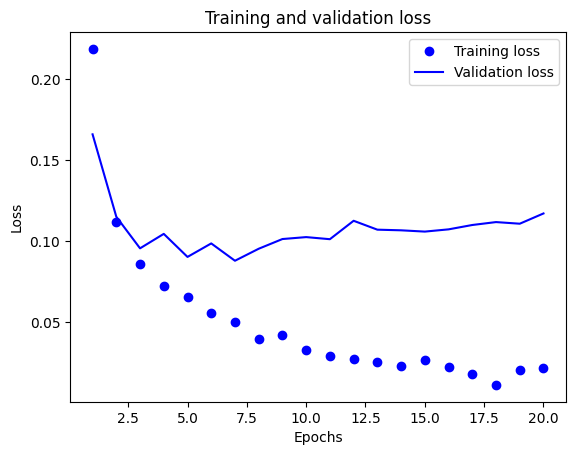

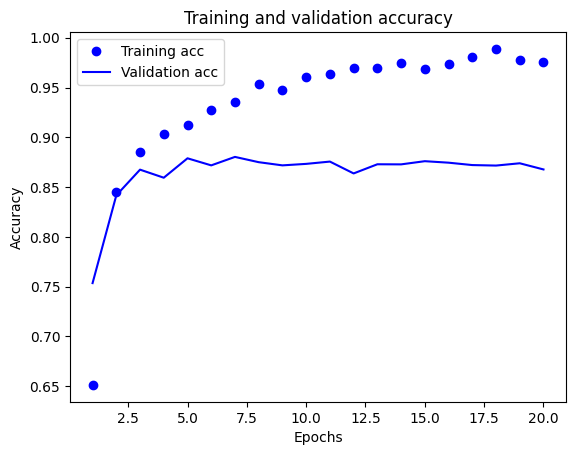

In [ ]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [88]:
#Re-train the model from scratch
model7 = keras.Sequential([
    layers.Dense(512, activation="tanh"),
    layers.Dense(256, activation="tanh"),
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model7.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model7.fit(train_x, train_y, epochs=4, batch_size=512)
results_valid = model7.evaluate(x_valid, y_valid)



Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6349 - loss: 0.2221
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8675 - loss: 0.0956
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8890 - loss: 0.0819
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9080 - loss: 0.0687
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8783 - loss: 0.0861


In [89]:
results_valid

[0.08795588463544846, 0.8773000240325928]

In [91]:
model7.fit(train_x, train_y, epochs=4, batch_size=512)
results_test = model7.evaluate(test_x, test_y)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9620 - loss: 0.0320
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9638 - loss: 0.0306
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9631 - loss: 0.0309
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9708 - loss: 0.0260
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8652 - loss: 0.1122


In [92]:
results_test

[0.1095719262957573, 0.869159996509552]

In [93]:
model7.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01011447],
       [0.99625754],
       [0.65825266],
       ...,
       [0.17249238],
       [0.0116498 ],
       [0.8799407 ]], dtype=float32)

## **Model 8**
#### Model 8 has 1 hidden layer with 128 units, uses the ReLU activation function, including L2 regularization of 0.01, and is trained using the MSE Funcion

In [94]:
# build the model with 1 hidden layer
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model8 = keras.Sequential([
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model8.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))


history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.6860 - loss: 0.4351 - val_accuracy: 0.8628 - val_loss: 0.2989
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8723 - loss: 0.2779 - val_accuracy: 0.8554 - val_loss: 0.2439
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8934 - loss: 0.2139 - val_accuracy: 0.8747 - val_loss: 0.1967
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9034 - loss: 0.1741 - val_accuracy: 0.8799 - val_loss: 0.1699
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9086 - loss: 0.1486 - val_accuracy: 0.8313 - val_loss: 0.1819
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9071 - loss: 0.1339 - val_accuracy: 0.8783 - val_loss: 0.1414
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9132 - loss: 0.1192 - val_accuracy: 0.8837 - val_loss: 0.1305
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9211 - loss: 0.1080 - val_accuracy: 0.8718 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

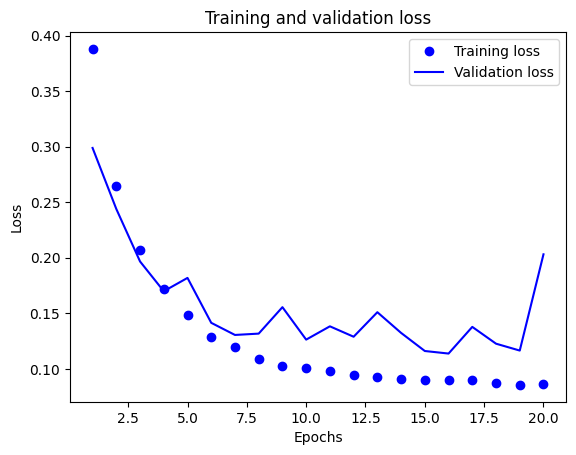

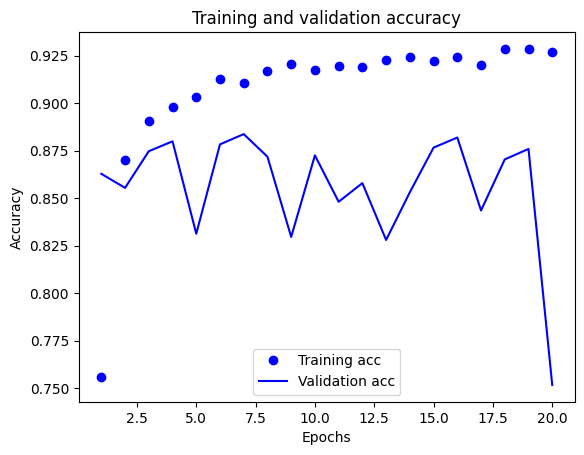

In [98]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
#Re-train the model from scratch
model8 = keras.Sequential([
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.001) ),
    layers.Dense(1, activation="sigmoid")
])
model8.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model8.fit(train_x, train_y, epochs=7, batch_size=512)
results_valid = model8.evaluate(x_valid, y_valid)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7047 - loss: 0.4118
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8718 - loss: 0.2344
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8849 - loss: 0.1734
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9039 - loss: 0.1351
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8971 - loss: 0.1222
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9071 - loss: 0.1079
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9081 - loss: 0.1022
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.1266


In [109]:
results_valid

[0.12632322311401367, 0.8600000143051147]

In [110]:
model8.fit(train_x, train_y, epochs=7, batch_size=512)
results_test = model8.evaluate(test_x, test_y)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9041 - loss: 0.1023
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9120 - loss: 0.0961
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9130 - loss: 0.0946
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9066 - loss: 0.0960
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9042 - loss: 0.0979
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9180 - loss: 0.0907
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9193 - loss: 0.0896
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8734 - loss: 0.1156


In [111]:
results_test

[0.11555301398038864, 0.8733199834823608]

In [112]:
model8.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.18854013],
       [0.99740773],
       [0.7416222 ],
       ...,
       [0.12049548],
       [0.07652307],
       [0.40393528]], dtype=float32)

## **Model 9**
#### (Model 8 has 3 hidden layers with 128, 64, and 32 units respectively, uses the Tanh activation function, includes a dropout of 0.1, applies L2 regularization of 0.001, and is trained using the mse loss function)



In [113]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model9 = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model9.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model9.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6505 - loss: 0.2093 - val_accuracy: 0.8504 - val_loss: 0.1145
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8734 - loss: 0.1012 - val_accuracy: 0.8781 - val_loss: 0.0889
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9097 - loss: 0.0728 - val_accuracy: 0.8479 - val_loss: 0.1124
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9220 - loss: 0.0621 - val_accuracy: 0.8815 - val_loss: 0.0881
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9425 - loss: 0.0479 - val_accuracy: 0.8843 - val_loss: 0.0878
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9480 - loss: 0.0422 - val_accuracy: 0.8708 - val_loss: 0.1016
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9592 - loss: 0.0359 - val_accuracy: 0.8725 - val_loss: 0.1018
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9578 - loss: 0.0353 - val_accuracy: 0.8637 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

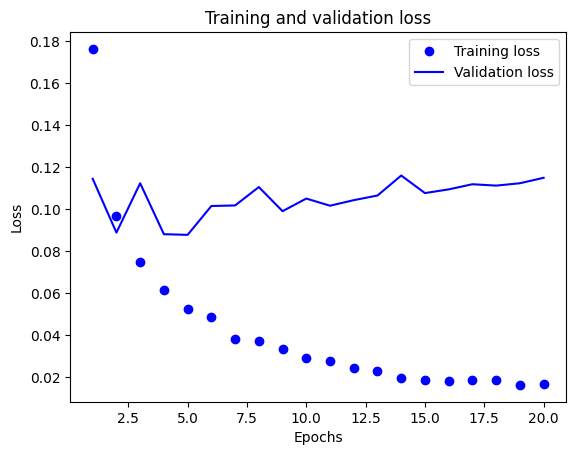

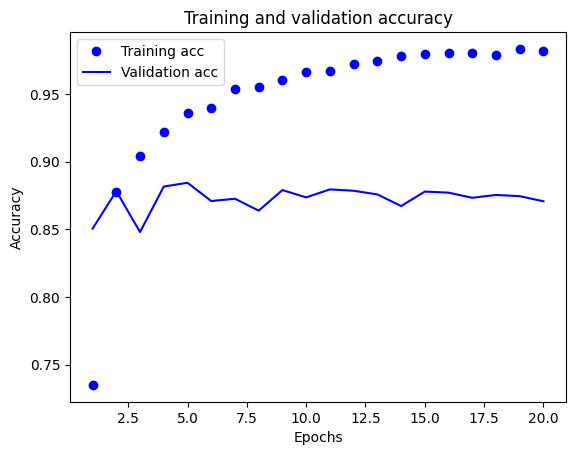

In [114]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
#Re-train the model from scratch
model9 = keras.Sequential([
    layers.Dense(128, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model9.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model9.fit(train_x, train_y, epochs=5, batch_size=512)
results_valid = model9.evaluate(x_valid, y_valid)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6926 - loss: 0.1927
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8848 - loss: 0.0862
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9099 - loss: 0.0697
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9240 - loss: 0.0592
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9312 - loss: 0.0544
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.0544


In [116]:
results_valid

[0.05614404380321503, 0.9259999990463257]

In [117]:
model9.fit(train_x, train_y, epochs=5, batch_size=512)
results_test = model9.evaluate(test_x, test_y)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9363 - loss: 0.0503
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9520 - loss: 0.0402
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9537 - loss: 0.0380
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9605 - loss: 0.0333
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9646 - loss: 0.0304
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8668 - loss: 0.1099


In [118]:
results_test

[0.10721457749605179, 0.8704000115394592]

In [120]:
model9.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.00621845],
       [0.99940336],
       [0.9483526 ],
       ...,
       [0.10257084],
       [0.00320026],
       [0.40432858]], dtype=float32)

## **Model 10**
#### (1 hidden layer with 32 units with Tanh activation and Dropuout(0.5), MSE)

In [121]:
# creating the model with Dropout (0.5)
from tensorflow import keras
from tensorflow.keras import layers

model10 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model10.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating the model
x_valid = train_x[:10000]
partial_train_x = train_x[10000:]
y_valid = train_y[:10000]
partial_train_y = train_y[10000:]

# Training the model
history = model10.fit(partial_train_x,
                    partial_train_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6819 - loss: 0.2080 - val_accuracy: 0.8314 - val_loss: 0.1349
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8512 - loss: 0.1239 - val_accuracy: 0.8741 - val_loss: 0.1047
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8822 - loss: 0.0993 - val_accuracy: 0.8783 - val_loss: 0.0964
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9043 - loss: 0.0816 - val_accuracy: 0.8857 - val_loss: 0.0882
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9176 - loss: 0.0720 - val_accuracy: 0.8858 - val_loss: 0.0868
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9281 - loss: 0.0645 - val_accuracy: 0.8864 - val_loss: 0.0836
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9346 - loss: 0.0582 - val_accuracy: 0.8874 - val_loss: 0.0829
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9460 - loss: 0.0517 - val_accuracy: 0.8863 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

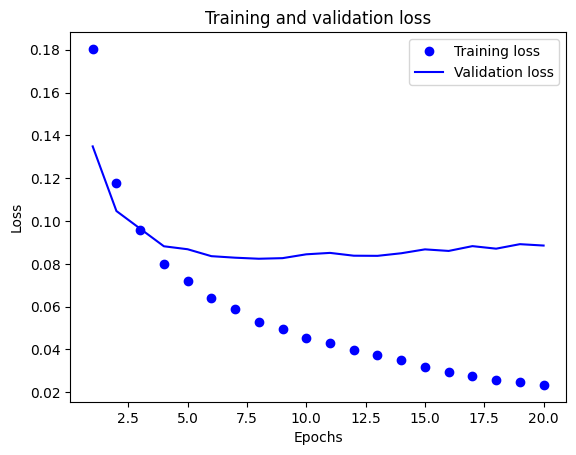

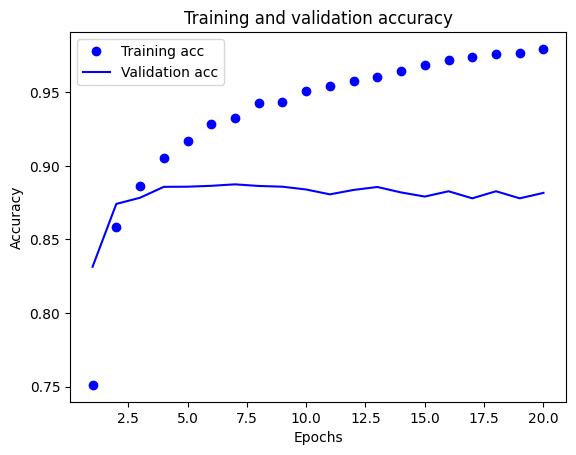

In [122]:
#Plot the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plot the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
#Re-train the model from scratch
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(train_x, train_y, epochs=7, batch_size=512)
results_valid = model.evaluate(x_valid, y_valid)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7248 - loss: 0.1917
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8856 - loss: 0.1012
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9091 - loss: 0.0778
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9204 - loss: 0.0671
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9273 - loss: 0.0614
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9339 - loss: 0.0548
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9388 - loss: 0.0518
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9559 - loss: 0.0407


In [124]:
results_valid

[0.042075302451848984, 0.9552000164985657]

In [125]:
model.fit(train_x, train_y, epochs=7, batch_size=512)
results_val = model.evaluate(test_x, test_y)

Epoch 1/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9436 - loss: 0.0484
Epoch 2/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9492 - loss: 0.0442
Epoch 3/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9500 - loss: 0.0436
Epoch 4/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9536 - loss: 0.0413
Epoch 5/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9595 - loss: 0.0367
Epoch 6/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9588 - loss: 0.0355
Epoch 7/7
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9613 - loss: 0.0345
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8683 - loss: 0.1014


In [126]:
results_val

[0.09903007745742798, 0.8725600242614746]

In [127]:
model.predict(test_x)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.06056557],
       [0.9999976 ],
       [0.9384131 ],
       ...,
       [0.22446503],
       [0.05131564],
       [0.7765928 ]], dtype=float32)